# Latar Belakang
Sebuah supermarket menjual berbagai produk antara lain wine, buah-buahan, daging, ikan, produk-manis, dan produk emas. Produk-produk tersebut dijual melalui berbagai channel penjualan antara lain melalui web, catalog, dan store. Pelanggan dari supermarket tersebut beragam usia, pendapatan, level pendidikan, dan jumlah anggota keluarganya.

# Pernyataan Masalah
Memberikan gambaran untuk strategi pemasaran serta pengembangan produk yang lebih baik sesuai dengan preferensi dan perilaku pelanggan

# Data Understanding & Data Cleaning
Untuk menjawab pertanyaan diatas, dilakukan analisa data Supermarket Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv
import re
import scipy.stats as sc
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Supermarket Customers.csv')
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


Setelah dilakukan import file, pada dataset terdapat delimiter '\t', maka akan dilakukan cleaning terhapap delimiter tersebut terlebih dahulu

In [3]:
# Baca file CSV dengan delimiter '\t'
filename = 'Supermarket Customers.csv'
delimiter = '\t'

# Membaca file CSV dan memprosesnya
with open(filename, 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter=delimiter)
    
    # Ambil nama kolom dari baris pertama
    kolom = next(reader)
    
    # Inisialisasi list kosong untuk menyimpan data
    data_rows = []
    
    # Iterasi melalui baris-baris berikutnya (data)
    for row in reader:
        data_rows.append(row)
    
# Buat DataFrame menggunakan pandas
df = pd.DataFrame(data_rows, columns=kolom)

# Tampilkan DataFrame
display(df.head(),df.tail())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Terdapat 29 kolom dalam dataset Supermarket Customers, antara lain:

Informasi Pelanggan
* ID: ID unik pelanggan
* Year_Birth: Tahun kelahiran pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan tahunan rumah tangga pelanggan
* Kidhome: Jumlah anak-anak di rumah pelanggan
* Teenhome: Jumlah remaja di rumah pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan melakukan complain dalam 2 tahun terakhir, 0 jika tidak

Pengeluaran Produk
* MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
* MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah yang dihabiskan untuk produk-manis dalam 2 tahun terakhir
* MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

Promosi
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 jika tidak
* AcceptedCmp2: 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 jika tidak
* AcceptedCmp3: 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 jika tidak
* AcceptedCmp4: 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 jika tidak
* AcceptedCmp5: 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 jika tidak
* Response: 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak

Tempat Pembelian
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Lain-Lain
* Z_CostContact: Biaya kontak atau interaksi dengan pelanggan
* Z_Revenue: Pendapatan atau hasil yang diperoleh dari interaksi dengan pelanggan

In [4]:
# Informasi Dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Year_Birth           2240 non-null   object
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   object
 6   Teenhome             2240 non-null   object
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   object
 9   MntWines             2240 non-null   object
 10  MntFruits            2240 non-null   object
 11  MntMeatProducts      2240 non-null   object
 12  MntFishProducts      2240 non-null   object
 13  MntSweetProducts     2240 non-null   object
 14  MntGoldProds         2240 non-null   object
 15  

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,...,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,8,1975,3,3,663,100,776,...,16,2,2,2,2,2,2,1,1,2
top,5524,1976,Graduation,Married,,0,0,31-08-2012,56,2,...,7,0,0,0,0,0,0,3,11,0
freq,1,89,1127,864,24,1293,1158,12,37,42,...,393,2077,2073,2077,2096,2210,2219,2240,2240,1906


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,...,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,8,1975,3,3,663,100,776,...,16,2,2,2,2,2,2,1,1,2
top,5524,1976,Graduation,Married,,0,0,31-08-2012,56,2,...,7,0,0,0,0,0,0,3,11,0
freq,1,89,1127,864,24,1293,1158,12,37,42,...,393,2077,2073,2077,2096,2210,2219,2240,2240,1906


In [6]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1975,"[58138, 46344, 71613, 26646, 58293, 62513, 55635, 33454, 30351, 5648, , 7500, 63033, 59354, 17323, 82800, 41850, 37760, 76995, 33812, 37040, 2447, 58607, 65324, 40689, 18589, 53359, 38360, 84618, 10979, 38620, 40548, 46610, 68657, 49389, 67353, 23718, 42429, 48948, 80011, 20559, 21994, 79941, 41728, 72550, 65486, 79143, 35790, 82582, 66373, 82384, 70287, 27938, 55954, 75777, 66653, 61823, 67680, 70666, 25721, 32474, 88194, 69096, 74854, 66991, 65031, 60631, 28332, 40246, 75251, 75825, 26326, 56046, 29760, 26304, 23559, 81361, 29440, 36138, 50388, 79593, 54178, 42394, 23626, 30096, 47916, 51813, 78497, 50150, 47823, 34554, 85693, 65846, 87195, 24594, 49096, 52413, 38557, 89058, 77298, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425

In [7]:
# Cek missing value pada data
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Secara umum, dapat dilihat bahwa:
* Data Supermarket Customers memiliki 29 kolom dan 2240 baris
* Kolom `ID`, `Complain`, `Z_CostContact`, `Z_Revenue`, `Recency` tidak relevan dengan tujuan analisis dan bisa di drop
* kolom `Year_Birth`, `Income`, `Kidhome`, `Teenhome`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data numerik
* Kolom `Year_Birth`, `Income` memiliki range data yang cukup besar, maka akan dibuat kategori dengan kisaran range tertentu
* Menambahkan kolom jumlah item yang dibeli pelanggan untuk memudahkan analisis statistik
* Kolom `Marital_Status` terlalu bervariatif, akan dikelompokkan menjadi Single (Single, Divorced, dan Widow), Together (Together, Married), dan Others (Alone, Absurd, dan YOLO)
* Kolom `Education` terlalu bervariatif, akan dikelompokkan menjadi Basic (Basic), Undergraduate (2n Cycle), Graduate (Graduation & Master), dan Postgraduate (PhD)
* Menambahkan Kolom `Family_Size` yang didapat dari Marital_Status (bila married = 2, bila single atau others = 1) dijumlahkan dengan `Kidhome` dan `Teenhome`

In [8]:
# Menghapus kolom `ID`, `Complain`, `Z_CostContact`, `Z_Revenue`
kolom_yang_dihapus = ['ID', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Recency']
df = df.drop(kolom_yang_dihapus, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138,0,0,04-09-2012,635,88,546,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344,1,1,08-03-2014,11,1,6,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613,0,0,21-08-2013,426,49,127,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646,1,0,10-02-2014,11,4,20,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293,1,0,19-01-2014,173,43,118,...,5,3,6,5,0,0,0,0,0,0


In [9]:
# Mengubah kolom type object menjadi float
kolom_numerik = ['Year_Birth','Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[kolom_numerik] = df[kolom_numerik].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
dtype: object


Kolom Year_Birth dan Dt_Customers dapat digunakan untuk mengetahui umur pelanggan saat pelanggan melakukan transaksi. Kolom tersebut nanti nya akan di drop dan diubah menjadi umur pelanggan

In [10]:
# Mengonversi kolom Dt_Customer menjadi tipe datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Mendapatkan tahun dari Dt_Customer
df['YearOfDt_Customer'] = df['Dt_Customer'].dt.year

# Menghitung umur customer dan menambahkan sebagai kolom baru
df['CustomersAge'] = df['YearOfDt_Customer'] - df['Year_Birth']

# Tampilkan hasil
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,YearOfDt_Customer,CustomersAge
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,...,4,7,0,0,0,0,0,1,2012,55
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,...,2,5,0,0,0,0,0,0,2014,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,...,10,4,0,0,0,0,0,0,2013,48
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,20,...,4,6,0,0,0,0,0,0,2014,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,...,6,5,0,0,0,0,0,0,2014,33


In [11]:
# Menghapus kolom Year_Birth dan YearOdDt_Customer
kolom_yang_dihapus2 = ['Year_Birth', 'Dt_Customer', 'YearOfDt_Customer']
df = df.drop(kolom_yang_dihapus2, axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,55
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,48
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,33


Menentukan kategori umur dengan melihat karakteristik sebaran umur dalam dataset

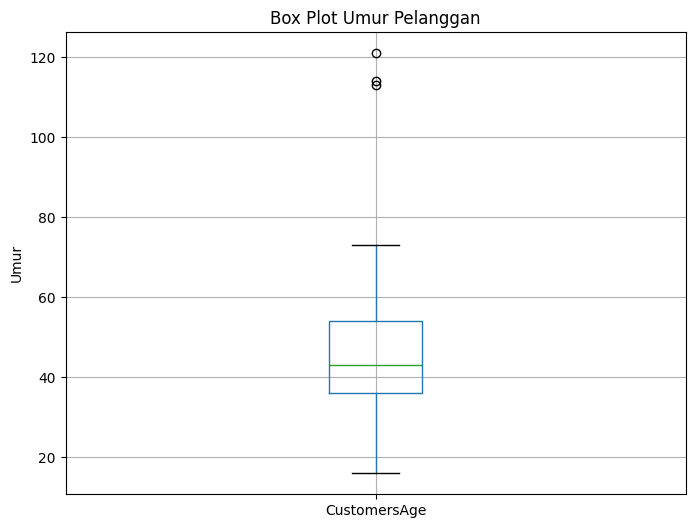

In [12]:
# Melihat sebaran data umur
plt.figure(figsize=(8, 6))
df.boxplot(column='CustomersAge')
plt.title('Box Plot Umur Pelanggan')
plt.ylabel('Umur')
plt.show()

In [13]:
# Mendapatkan indeks dari baris data umur anomali (umur lebih dari 100)
index_to_drop = df[df['CustomersAge'] > 100].index

# Menghapus baris menggunakan indeks
df.drop(index_to_drop, inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,55
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,48
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,33


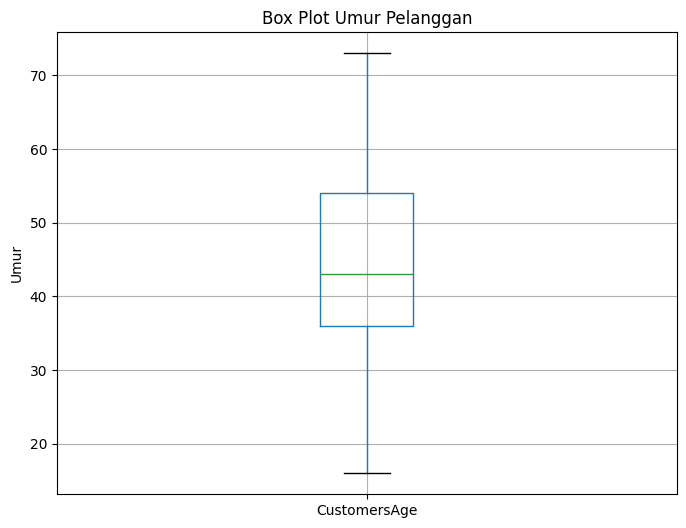

In [14]:
# Melihat kwembali sebaran data umur
plt.figure(figsize=(8, 6))
df.boxplot(column='CustomersAge')
plt.title('Box Plot Umur Pelanggan')
plt.ylabel('Umur')
plt.show()

In [15]:
# Melihat statistik deskriptif umur pelanggan
df['CustomersAge'].describe()

count    2237.000000
mean       44.126062
std        11.739008
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: CustomersAge, dtype: float64

Dengan sebaran data seperti di atas maka umur pelanggan dapat dikategorikan
* <21
* 21-30
* 31-40
* 41-50
* 51-60
* 61-70
* >70

In [16]:
# Menentukan bins dan labels untuk kategori umur
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['<21', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Membuat kolom Age_Category berdasarkan pd.cut()
df['Age_Category'] = pd.cut(df['CustomersAge'], bins=bins, labels=labels)

# Menampilkan data
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,0,1,55,51-60
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,0,0,60,51-60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,0,48,41-50
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,0,30,21-30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,0,0,0,33,31-40


Menentukan kategori income dengan melihat karakteristik sebaran pendapatan dalam dataset

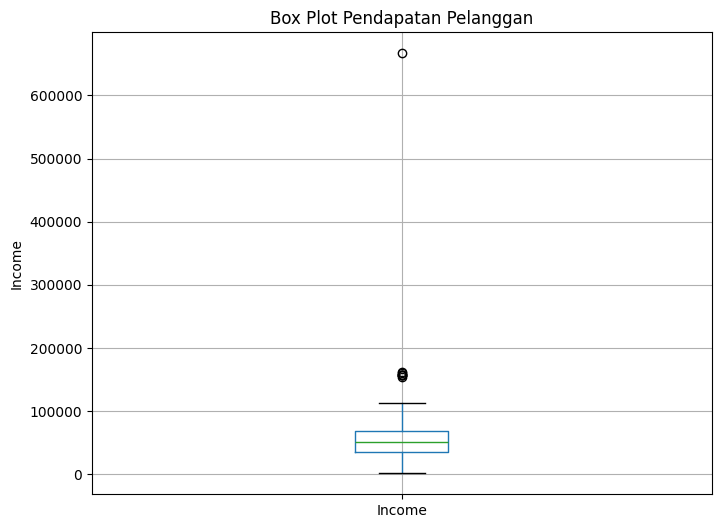

In [17]:
# Melihat sebaran data pendapatan pelanggan
plt.figure(figsize=(8, 6))
df.boxplot(column='Income')
plt.title('Box Plot Pendapatan Pelanggan')
plt.ylabel('Income')
plt.show()

In [18]:
# Mendapatkan indeks dari baris yang data income anomali 
index_to_drop2 = df[df['Income'] > 200000].index

# Menghapus baris menggunakan indeks
df.drop(index_to_drop2, inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,0,1,55,51-60
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,0,0,60,51-60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,0,48,41-50
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,0,30,21-30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,0,0,0,33,31-40


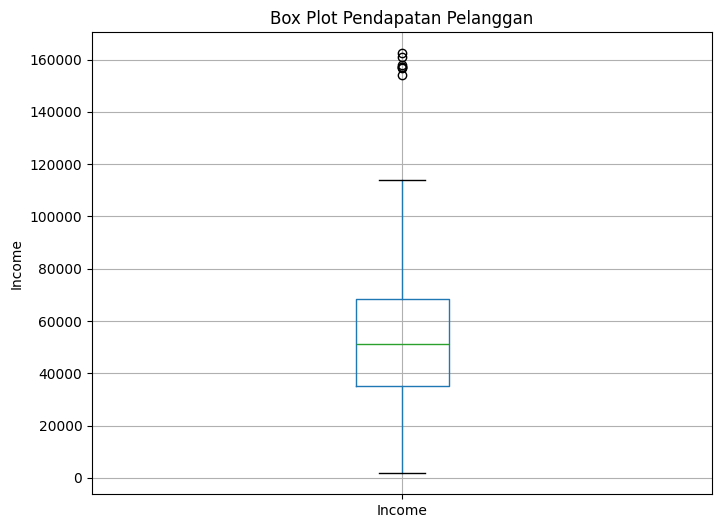

In [19]:
# Cek kembali sebaran data menggunakan boxplot
# Melihat sebaran data pendapatan pelanggan
plt.figure(figsize=(8, 6))
df.boxplot(column='Income')
plt.title('Box Plot Pendapatan Pelanggan')
plt.ylabel('Income')
plt.show()

In [20]:
# Melihat statistik deskriptif income pelanggan
df['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

Dengan sebaran data seperti di atas maka income pelanggan dapat dikategorikan
* <5001
* 5001-20000
* 20001-35000
* 35001-50000
* 50001-65000
* 65001-80000
* 80001-95000
* >95000

In [21]:
# Mendefinisikan bins dan labels untuk kategori pendapatan
bins = [0, 5000, 20000, 35000, 50000, 65000, 80000, 95000, float('inf')]
labels = ['<5001', '5001-20000', '20001-35000', '35001-50000', '50001-65000', '65001-80000', '80001-95000', '>95000']

# Membuat kolom Income_Category berdasarkan pd.cut()
df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Menampilkan data
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category,Income_Category
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,7,0,0,0,0,0,1,55,51-60,50001-65000
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,5,0,0,0,0,0,0,60,51-60,35001-50000
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,4,0,0,0,0,0,0,48,41-50,65001-80000
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,6,0,0,0,0,0,0,30,21-30,20001-35000
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,5,0,0,0,0,0,0,33,31-40,50001-65000


In [22]:
# Cek Data NaN
df.isna().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
CustomersAge            0
Age_Category            0
Income_Category        24
dtype: int64

In [23]:
# Hapus data NaN
df.dropna(inplace=True)

Membuat kolom baru untuk mengetahui total jumlah item yang dibeli pelanggan

In [24]:
# Menambahkan kolom baru 'TotalAmountAllItem' yang berisi penjumlahan dari kolom produk yang ada
columns_to_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalAmountAllItem'] = df[columns_to_sum].sum(axis=1)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category,Income_Category,TotalAmountAllItem
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,0,0,0,0,0,1,55,51-60,50001-65000,1617
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,0,0,0,0,0,0,60,51-60,35001-50000,27
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,0,0,0,0,0,0,48,41-50,65001-80000,776
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,0,0,0,0,0,0,30,21-30,20001-35000,53
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,0,0,0,0,0,0,33,31-40,50001-65000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,709,43,182,42,118,...,0,0,0,0,0,0,46,41-50,50001-65000,1341
2236,PhD,Together,64014.0,2,1,406,0,30,0,0,...,0,0,0,1,0,0,68,61-70,50001-65000,444
2237,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,...,0,1,0,0,0,0,33,31-40,50001-65000,1241
2238,Master,Together,69245.0,0,1,428,30,214,80,30,...,0,0,0,0,0,0,58,51-60,65001-80000,843


Melakukan kategorisasi ulang untuk kolom Marital_Status

In [25]:
# Melakukan definisi fungsi kategorisasi
def categorize_marital_status(maritalstatus2):
    if maritalstatus2 == 'Single':
        return 'Single'
    elif maritalstatus2 == 'Divorced':
        return 'Single'
    elif maritalstatus2 == 'Widow':
        return 'Single'
    elif maritalstatus2 == 'Married':
        return 'Together'
    elif maritalstatus2 == 'Together':
        return 'Together'
    elif maritalstatus2 == 'Alone':
        return 'Others'
    elif maritalstatus2 == 'Absurd':
        return 'Others'
    elif maritalstatus2 == 'YOLO':
        return 'Others'

# Menerapkan fungsi ke kolom yang ada
df['Marital_Status']=df['Marital_Status'].apply(categorize_marital_status)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category,Income_Category,TotalAmountAllItem
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,0,0,0,0,0,1,55,51-60,50001-65000,1617
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,0,0,0,0,0,0,60,51-60,35001-50000,27
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,0,0,0,0,0,0,48,41-50,65001-80000,776
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,0,0,0,0,0,0,30,21-30,20001-35000,53
4,PhD,Together,58293.0,1,0,173,43,118,46,27,...,0,0,0,0,0,0,33,31-40,50001-65000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Together,61223.0,0,1,709,43,182,42,118,...,0,0,0,0,0,0,46,41-50,50001-65000,1341
2236,PhD,Together,64014.0,2,1,406,0,30,0,0,...,0,0,0,1,0,0,68,61-70,50001-65000,444
2237,Graduation,Single,56981.0,0,0,908,48,217,32,12,...,0,1,0,0,0,0,33,31-40,50001-65000,1241
2238,Master,Together,69245.0,0,1,428,30,214,80,30,...,0,0,0,0,0,0,58,51-60,65001-80000,843


In [26]:
# Cek data setelah diubah
df['Marital_Status'].unique()

array(['Single', 'Together', 'Others'], dtype=object)

Melakukan kategorisasi ulang untuk kolom Education

In [27]:
# Melakukan definisi fungsi kategorisasi
def categorize_education(education2):
    if education2 == 'Basic':
        return 'Basic Education'
    elif education2 == '2n Cycle':
        return 'Undergraduate'
    elif education2 == 'Graduation':
        return 'Graduate'
    elif education2 == 'Master':
        return 'Graduate'
    elif education2 == 'PhD':
        return 'Postgraduate'

# Menerapkan fungsi ke kolom yang ada
df['Education']=df['Education'].apply(categorize_education)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category,Income_Category,TotalAmountAllItem
0,Graduate,Single,58138.0,0,0,635,88,546,172,88,...,0,0,0,0,0,1,55,51-60,50001-65000,1617
1,Graduate,Single,46344.0,1,1,11,1,6,2,1,...,0,0,0,0,0,0,60,51-60,35001-50000,27
2,Graduate,Together,71613.0,0,0,426,49,127,111,21,...,0,0,0,0,0,0,48,41-50,65001-80000,776
3,Graduate,Together,26646.0,1,0,11,4,20,10,3,...,0,0,0,0,0,0,30,21-30,20001-35000,53
4,Postgraduate,Together,58293.0,1,0,173,43,118,46,27,...,0,0,0,0,0,0,33,31-40,50001-65000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Together,61223.0,0,1,709,43,182,42,118,...,0,0,0,0,0,0,46,41-50,50001-65000,1341
2236,Postgraduate,Together,64014.0,2,1,406,0,30,0,0,...,0,0,0,1,0,0,68,61-70,50001-65000,444
2237,Graduate,Single,56981.0,0,0,908,48,217,32,12,...,0,1,0,0,0,0,33,31-40,50001-65000,1241
2238,Graduate,Together,69245.0,0,1,428,30,214,80,30,...,0,0,0,0,0,0,58,51-60,65001-80000,843


In [28]:
# Cek data setelah diubah
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Basic Education', 'Undergraduate'],
      dtype=object)

Membuat kolom jumlah Family_Size

In [29]:
# Mapping nilai Marital_Status
marital_status_map = {'Single': 1, 'Together': 2, 'Others': 1}
df['Marital_Status_Num'] = df['Marital_Status'].map(marital_status_map)

# Membuat kolom FamilySize
df['FamilySize'] = df['Marital_Status_Num'] + df['Kidhome'] + df['Teenhome']

# Menampilkan DataFrame
df

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CustomersAge,Age_Category,Income_Category,TotalAmountAllItem,Marital_Status_Num,FamilySize
0,Graduate,Single,58138.0,0,0,635,88,546,172,88,...,0,0,0,1,55,51-60,50001-65000,1617,1,1
1,Graduate,Single,46344.0,1,1,11,1,6,2,1,...,0,0,0,0,60,51-60,35001-50000,27,1,3
2,Graduate,Together,71613.0,0,0,426,49,127,111,21,...,0,0,0,0,48,41-50,65001-80000,776,2,2
3,Graduate,Together,26646.0,1,0,11,4,20,10,3,...,0,0,0,0,30,21-30,20001-35000,53,2,3
4,Postgraduate,Together,58293.0,1,0,173,43,118,46,27,...,0,0,0,0,33,31-40,50001-65000,422,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Together,61223.0,0,1,709,43,182,42,118,...,0,0,0,0,46,41-50,50001-65000,1341,2,3
2236,Postgraduate,Together,64014.0,2,1,406,0,30,0,0,...,0,1,0,0,68,61-70,50001-65000,444,2,5
2237,Graduate,Single,56981.0,0,0,908,48,217,32,12,...,0,0,0,0,33,31-40,50001-65000,1241,1,1
2238,Graduate,Together,69245.0,0,1,428,30,214,80,30,...,0,0,0,0,58,51-60,65001-80000,843,2,3


## Data yang Sudah Bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [30]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2212, 28)


,dataFeatures,dataType,null,unique,uniqueSample
0,Education,object,0,4,"[Basic Education, Postgraduate]"
1,Marital_Status,object,0,3,"[Others, Together]"
2,Income,float64,0,1970,"[84169.0, 36957.0]"
3,Kidhome,int64,0,3,"[2, 0]"
4,Teenhome,int64,0,3,"[0, 2]"
5,MntWines,int64,0,775,"[88, 556]"
6,MntFruits,int64,0,158,"[72, 0]"
7,MntMeatProducts,int64,0,553,"[505, 138]"
8,MntFishProducts,int64,0,182,"[149, 259]"
9,MntSweetProducts,int64,0,176,"[20, 72]"


In [31]:
# Import Data Baru
df.to_csv('Manipulated_Supermarket_Customers.csv', index=False)

# 1. Analisis Demografis Usia Pelanggan

Dilakukan analisis distribusi usia pelanggan dan hubungannya dengan jumlah item belanja pelanggan

Visualisasi data sebaran umur pelanggan menggunakan histogram

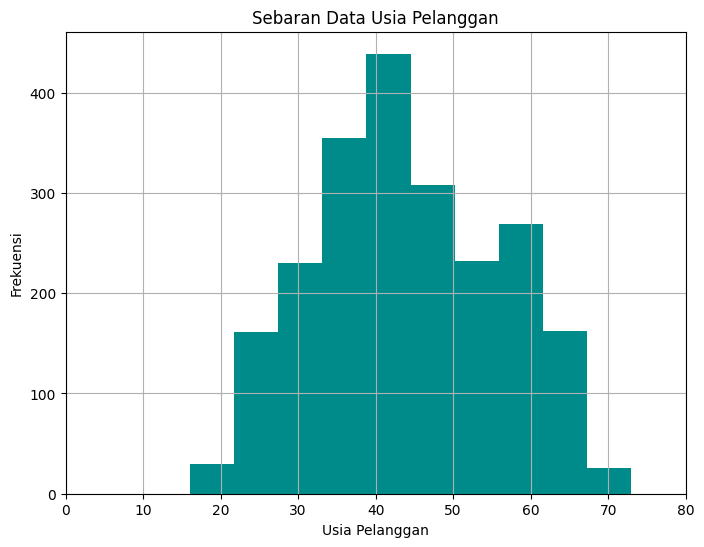

In [32]:
# create bar chart menggunakan matplotlib - custom
plt.figure(figsize=(8,6)) 
plt.hist(df['CustomersAge'], color='#008B8B', bins=10)
plt.title('Sebaran Data Usia Pelanggan')
plt.xlabel('Usia Pelanggan', size=10)
plt.ylabel('Frekuensi')
plt.grid(True)
plt.xticks(np.arange(0,81,10))
plt.show()

Sekarang dilakukan pengecekan, Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur?

In [33]:
# cek distribusi kolom usia
from scipy.stats import normaltest
stats, pval=normaltest(df['CustomersAge'])
if pval <= 0.05:
    print('Tolak H0, Data tidak berdistribusi normal')
else:
    print('Gagal tolak H0, Data berdistribusi normal')

Tolak H0, Data tidak berdistribusi normal


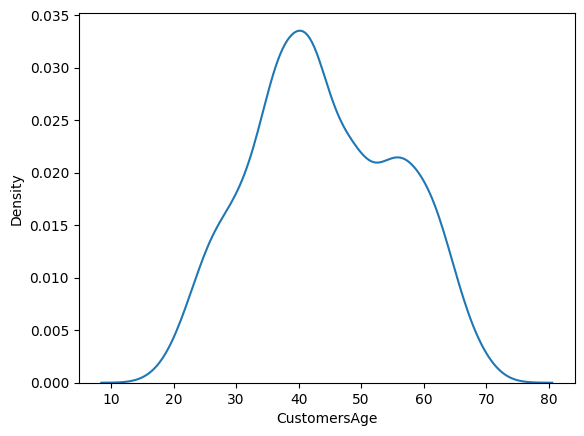

In [34]:
# cek KDE Plot
sns.kdeplot(df['CustomersAge'])
plt.show()

Karena hasil uji normalitas dan KDE Plot menunjukkan bahwa variabel CustomersAge tidak berdistribusi normal maka akan dilakukan uji non parametrik

Jumlah objek Age_Category >2 maka digunakan uji Kruskal Wallis

Problem:
- Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur?

Hipotesis:
- H0: tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur
- H1: terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur

In [35]:
# uji statistik, apakah ada perbedaan jumlah item belanja yang dibeli pelanggan (TotalAmountAllItem) antar kelompok umur (Age_Category)
# karena distribusi data tidak normal, digunakan uji kruskal wallis
df['Age_Category'].value_counts()

Age_Category
41-50    623
31-40    604
51-60    465
21-30    279
61-70    221
<21       17
>70        3
Name: count, dtype: int64

In [36]:
# solusi

pval_umur = sc.kruskal(df[df['Age_Category'] == '<21']['TotalAmountAllItem'],
           df[df['Age_Category'] == '21-30']['TotalAmountAllItem'],
           df[df['Age_Category'] == '31-40']['TotalAmountAllItem'],
           df[df['Age_Category'] == '41-50']['TotalAmountAllItem'],
           df[df['Age_Category'] == '51-60']['TotalAmountAllItem'],
           df[df['Age_Category'] == '61-70']['TotalAmountAllItem'],
           df[df['Age_Category'] == '>70']['TotalAmountAllItem'],)[1]

if pval_umur <= 0.05:
    print('Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur')
else:
    print('Gagal tolak H0, tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur')

Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok umur


In [37]:
# Cek Statistik Deskriptif umur pelanggan (CustomersAge)
df['CustomersAge'].describe()

count    2212.000000
mean       44.114376
std        11.738136
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: CustomersAge, dtype: float64

In [38]:
# Cek modus umur pelanggan (CustomersAge)
df['CustomersAge'].mode()

0    41
Name: CustomersAge, dtype: int64

Berdasarkan histogram, uji statistik kruskal wallis, dan statistik deskriptif usia pelanggan diatas, dapat disimpulkan:
* Rentang usia terbanyak adalah antara 30 hingga 50 tahun, dengan frekuensi tertinggi mencapai hampir sekitar 500 pelanggan
* Ada beberapa pelanggan yang berada di bawah usia 20 tahun dan beberapa di atas usia 70 tahun, namun jumlahnya sangat sedikit dibandingkan dengan rentang usia 30-60 tahun
* Terdapat perbedaan yang signifikan jumlah item belanja yang dibeli pelanggan antar kelompok umur
* Pelanggan yang berbelanja di supermarket mulai dari umur 16 hingga 73 tahun. Rata-rata pelanggan yang berbelanja di supermarket tersebut sekitar umur 44 tahun, jumlah pelanggan paling banyak berumur 41 tahun


# 2. Analisis Demografis Pendapatan Pelanggan

Dilakukan analisis distribusi pendapatan pelanggan dan hubungannya dengan jumlah item belanja pelanggan

Visualisasi data sebaran pendapatan pelanggan menggunakan histogram

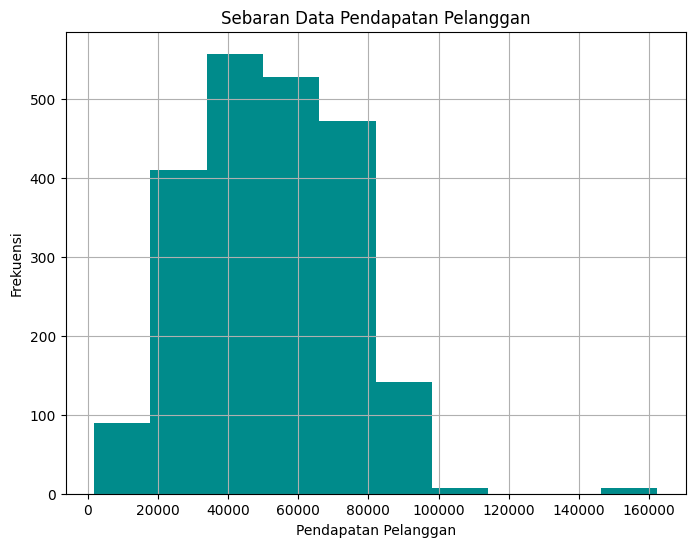

In [39]:
# create bar chart menggunakan matplotlib - custom
plt.figure(figsize=(8,6)) 
plt.hist(df['Income'], color='#008B8B')
plt.title('Sebaran Data Pendapatan Pelanggan')
plt.xlabel('Pendapatan Pelanggan',size=10)
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

Sekarang dilakukan pengecekan, Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan?

In [40]:
# cek distribusi kolom pendapatan
from scipy.stats import normaltest
stats, pval2=normaltest(df['Income'])
if pval2<= 0.05:
    print('Tolak H0, Data tidak berdistribusi normal')
else:
    print('Gagal tolak H0, Data berdistribusi normal')

Tolak H0, Data tidak berdistribusi normal


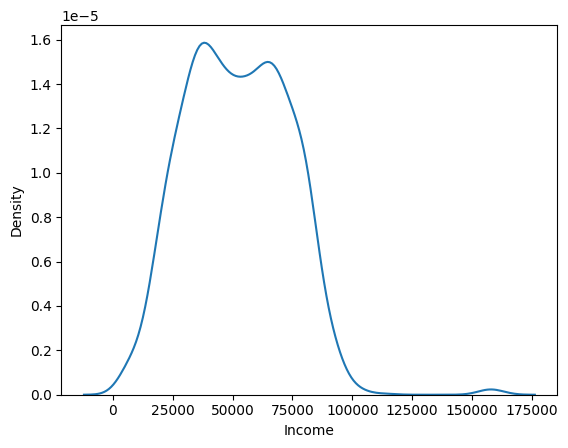

In [41]:
# cek KDE Plot
sns.kdeplot(df['Income'])
plt.show()

Karena hasil uji normalitas dan KDE Plot menunjukkan bahwa variabel Income tidak berdistribusi normal maka akan dilakukan uji non parametrik

Jumlah objek Income_Category >2 maka digunakan uji Kruskal Wallis

Problem:
- Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan?

Hipotesis:
- H0: tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan
- H1: terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan

In [42]:
# uji statistik, apakah ada perbedaan jumlah item belanja yang dibeli pelanggan (TotalAmountAllItem) antar kelompok umur (Income_Category)
# karena distribusi data tidak normal, digunakan uji kruskal wallis
df['Income_Category'].value_counts()

Income_Category
35001-50000    510
50001-65000    479
65001-80000    459
20001-35000    422
80001-95000    196
5001-20000     121
>95000          19
<5001            6
Name: count, dtype: int64

In [43]:
# solusi

pval_income = sc.kruskal(df[df['Income_Category'] == '<21']['TotalAmountAllItem'],
           df[df['Income_Category'] == '<5001']['TotalAmountAllItem'],
           df[df['Income_Category'] == '5001-20000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '20001-35000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '35001-50000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '50001-65000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '65001-80000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '80001-95000']['TotalAmountAllItem'],
           df[df['Income_Category'] == '>95000']['TotalAmountAllItem'])[1]

if pval_income <= 0.05:
    print('Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan')
else:
    print('Gagal tolak H0, tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan')

Gagal tolak H0, tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan


In [44]:
# Cek Statistik Deskriptif pendapatan pelanggan (Income)
df['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [45]:
# Cek modus pendapatan pelanggan (Income)
df['Income'].mode()

0    7500.0
Name: Income, dtype: float64

Berdasarkan histogram, uji statistik kruskal wallis, dan statistik deskriptif pendapatan pelanggan diatas, dapat disimpulkan:
* Rentang pendapatan pelanggan yang berbelanja di supermarket adalah antara 20000 hingga 80000, dengan frekuensi tertinggi di angka 40000 mencapai hampir sekitar 600 pelanggan
* Ada beberapa pelanggan yang memilii pendapatan di bawah 20000 dan beberapa di atas 100000, namun jumlahnya sangat sedikit dibandingkan dengan rentang pendapatan 20000 hingga 80000
* Tidak terdapat perbedaan yang signifikan jumlah item belanja yang dibeli pelanggan antar kelompok pendapatan
* Pelanggan yang berbelanja di supermarket memiliki pendapatan mulai dari 1730 hingga 162397. Rata-rata pendapatan pelanggan yang berbelanja di supermarket tersebut sekitar 51959, jumlah pelanggan paling banyak memiliki pendapatan sebesar 7500

# 3. Analisis Demografis Level Pendidikan Pelanggan

Dilakukan analisis distribusi level pendidikan pelanggan dan hubungannya dengan jumlah item belanja pelanggan

Visualisasi data sebaran level pendidikan pelanggan menggunakan histogram

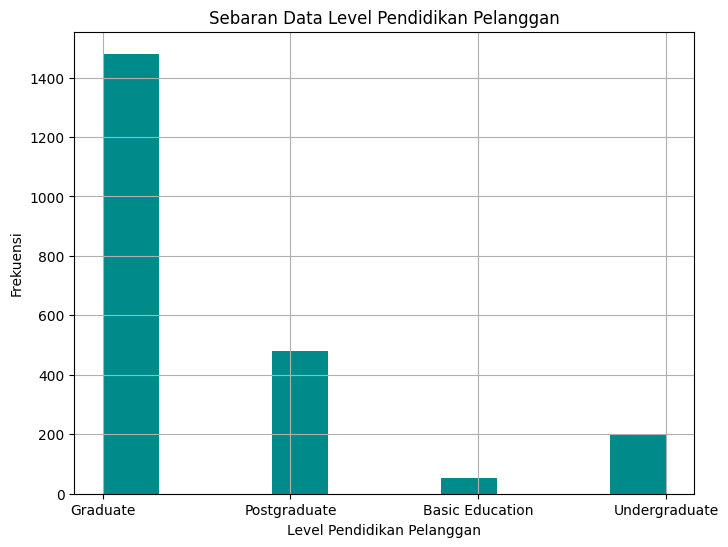

In [46]:
# create bar chart menggunakan matplotlib - custom
plt.figure(figsize=(8,6)) 
plt.hist(df['Education'], color='#008B8B')
plt.title('Sebaran Data Level Pendidikan Pelanggan')
plt.xlabel('Level Pendidikan Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

Sekarang dilakukan pengecekan, Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan pelanggan?

In [47]:
# Mengkodekan kategori pendidikan sebagai nilai numerik
df['Education_Code'] = df['Education'].replace({
    'Basic Education': 1,
    'Undergraduate': 2,
    'Graduate': 3,
    'Postgraduate': 4
})

# Melakukan uji normalitas terhadap kolom 'Education_Code'
stats, pval3 = normaltest(df['Education_Code'])

# Menampilkan hasil uji normalitas
if pval3 <= 0.05:
    print('Tolak H0, Data tidak berdistribusi normal')
else:
    print('Terima H0, Data berdistribusi normal')

Tolak H0, Data tidak berdistribusi normal


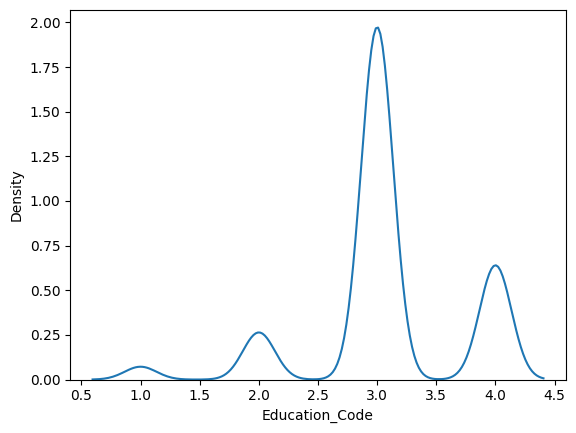

In [48]:
# cek KDE Plot
sns.kdeplot(df['Education_Code'])
plt.show()

Karena hasil uji normalitas dan KDE Plot menunjukkan bahwa variabel Level Pendidikan tidak berdistribusi normal maka akan dilakukan uji non parametrik

Jumlah objek Education >2 maka digunakan uji Kruskal Wallis

Problem:
- Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan pelanggan?

Hipotesis:
- H0: tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan pelanggan
- H1: terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan pelanggan

In [49]:
# uji statistik, apakah ada perbedaan jumlah item belanja yang dibeli pelanggan (TotalAmountAllItem) antar level pendidikan (Education)
# karena distribusi data tidak normal, digunakan uji kruskal wallis
df['Education'].value_counts()

Education
Graduate           1480
Postgraduate        480
Undergraduate       198
Basic Education      54
Name: count, dtype: int64

In [50]:
# solusi

pval_education = sc.kruskal(df[df['Education'] == 'Basic Education']['TotalAmountAllItem'],
           df[df['Education'] == 'Undergraduate']['TotalAmountAllItem'],
           df[df['Education'] == 'Graduate']['TotalAmountAllItem'],
           df[df['Education'] == 'Postgraduate']['TotalAmountAllItem'])[1]

if pval_education <= 0.05:
    print('Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan')
else:
    print('Gagal tolak H0, tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan')

Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan


In [51]:
# Cek Statistik Deskriptif level pendidikan pelanggan (Education)
df['Education'].describe()

count         2212
unique           4
top       Graduate
freq          1480
Name: Education, dtype: object

Berdasarkan histogram, uji statistik kruskal wallis, dan statistik deskriptif level pendidikan pelanggan diatas, dapat disimpulkan:
* Level pendidikan pelanggan yang berbelanja di supermarket adalah basic education, undergraduate, graduate, dan postgraduate, dengan frekuensi tertinggi di level graduate mencapai sekitar 1480 pelanggan
* Level pendidikan pelanggan paling sedikit adalah basic graduate dengan frekuensi 54 pelanggan
* Terdapat perbedaan yang signifikan jumlah item belanja yang dibeli pelanggan antar kelompok level pendidikan pelanggan

# 4. Analisis Demografis Jumlah Anggota Keluarga Pelanggan

Dilakukan analisis distribusi jumlah anggota keluarga pelanggan dan hubungannya dengan jumlah item belanja pelanggan

Visualisasi data sebaran jumlah anggota keluarga pelanggan menggunakan histogram

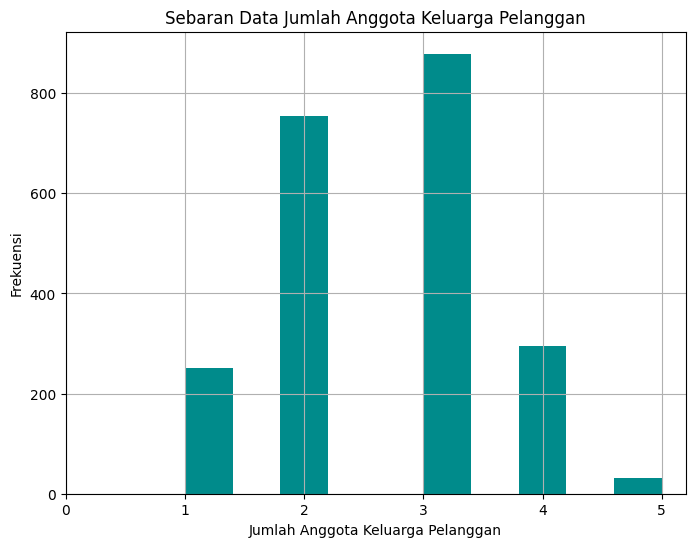

In [52]:
# create bar chart menggunakan matplotlib - custom
plt.figure(figsize=(8,6)) 
plt.hist(df['FamilySize'], color='#008B8B')
plt.title('Sebaran Data Jumlah Anggota Keluarga Pelanggan')
plt.xlabel('Jumlah Anggota Keluarga Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.xticks(np.arange(0,6,1))
plt.show()

Sekarang dilakukan pengecekan, Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan?

In [53]:
# cek distribusi kolom pendapatan
from scipy.stats import normaltest
stats, pval4=normaltest(df['FamilySize'])
if pval4<= 0.05:
    print('Tolak H0, Data tidak berdistribusi normal')
else:
    print('Gagal tolak H0, Data berdistribusi normal')

Tolak H0, Data tidak berdistribusi normal


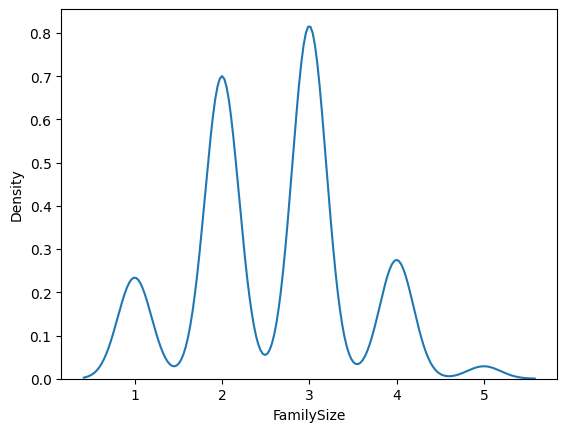

In [54]:
# cek KDE Plot
sns.kdeplot(df['FamilySize'])
plt.show()

Karena hasil uji normalitas dan KDE Plot menunjukkan bahwa variabel jumlah anggota keluarga pelanggan tidak berdistribusi normal maka akan dilakukan uji non parametrik

Jumlah objek anggota keluarga pelanggan >2 maka digunakan uji Kruskal Wallis

Problem:
- Apakah terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan?

Hipotesis:
- H0: tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan
- H1: terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan

In [55]:
# uji statistik, apakah ada perbedaan jumlah item belanja yang dibeli pelanggan (TotalAmountAllItem) antar kelompok jumlah anggota keluarga (FamilySize)
# karena distribusi data tidak normal, digunakan uji kruskal wallis
df['FamilySize'].value_counts()

FamilySize
3    879
2    754
4    296
1    252
5     31
Name: count, dtype: int64

In [56]:
# Cek modus jumlah anggota keluarga pelanggan (FamilySize)
df['FamilySize'].mode()

0    3
Name: FamilySize, dtype: int64

In [57]:
# solusi

pval_family = sc.kruskal(df[df['FamilySize'] == 1]['TotalAmountAllItem'],
           df[df['FamilySize'] == 2]['TotalAmountAllItem'],
           df[df['FamilySize'] == 3]['TotalAmountAllItem'],
           df[df['FamilySize'] == 4]['TotalAmountAllItem'],
           df[df['FamilySize'] == 5]['TotalAmountAllItem'],)[1]

if pval_family <= 0.05:
    print('Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan')
else:
    print('Gagal tolak H0, tidak terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan')

Tolak H0, terdapat perbedaan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan


In [58]:
# Cek Statistik Deskriptif jumlah anggota keluarga pelanggan (FamilySize)
df['FamilySize'].describe()

count    2212.000000
mean        2.593128
std         0.906236
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FamilySize, dtype: float64

In [59]:
# tabel bantu - mean jumlah item belanja per jumlah keluarga
itemperfamilysz = df.groupby('FamilySize')['TotalAmountAllItem'].mean().reset_index()
itemperfamilysz

,FamilySize,TotalAmountAllItem
0,1,1107.230159
1,2,785.643236
2,3,443.397042
3,4,246.162162
4,5,299.032258


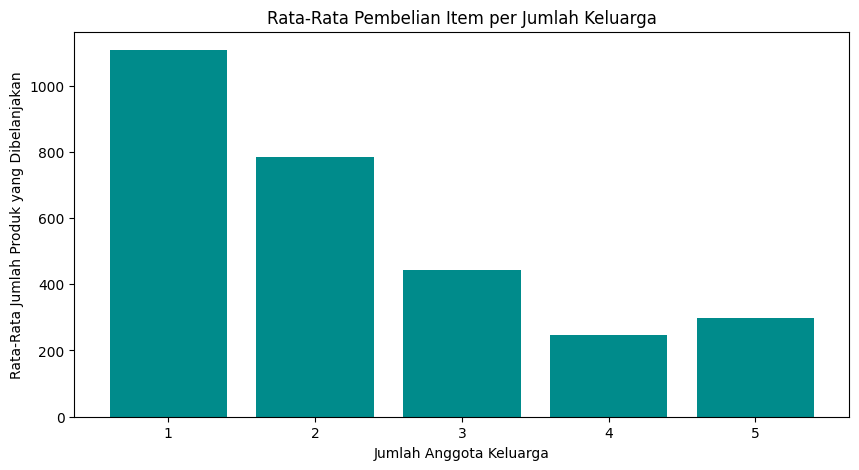

In [60]:
# create barchart dengan matplotlib
plt.figure(figsize = (10,5))
plt.bar(itemperfamilysz['FamilySize'], itemperfamilysz['TotalAmountAllItem'], color = '#008B8B')
plt.title('Rata-Rata Pembelian Item per Jumlah Keluarga')
plt.xlabel('Jumlah Anggota Keluarga')
plt.ylabel('Rata-Rata Jumlah Produk yang Dibelanjakan')
plt.show()

Berdasarkan histogram, uji statistik kruskal wallis, dan statistik deskriptif jumlah anggota keluarga pelanggan diatas, dapat disimpulkan:
* Rentang jumlah anggota keluarga pelanggan yang berbelanja di supermarket adalah antara 1 hingga 5 orang, dengan frekuensi tertinggi adalah pelanggan yang memiliki jumlah anggota keluarga sebanyak 3 orang
* Terdapat perbedaan yang signifikan jumlah item belanja yang dibeli pelanggan antar kelompok jumlah anggota keluarga pelanggan
* Rata-rata jumlah belanja produk paling tinggi adalah pelanggan dengan jumlah anggota keluarga hanya 1 orang, dan paling rendah adalah 4 orang anggota keluarga

# 5. Analisis Produk Penjualan Supermarket

Dilakukan analisis tren atau preferensi pelanggan untuk produk-produk seperti wine, buah-buahan, daging, ikan, produk-manis, dan produk emas

In [61]:
# Sum untuk masing-masing produk
product_sums = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Buat DataFrame baru
product_summary = pd.DataFrame({
    'Product': product_sums.index,
    'Total': product_sums.values
})

product_summary

,Product,Total
0,MntWines,675296
1,MntFruits,58241
2,MntMeatProducts,369470
3,MntFishProducts,83279
4,MntSweetProducts,59827
5,MntGoldProds,97164


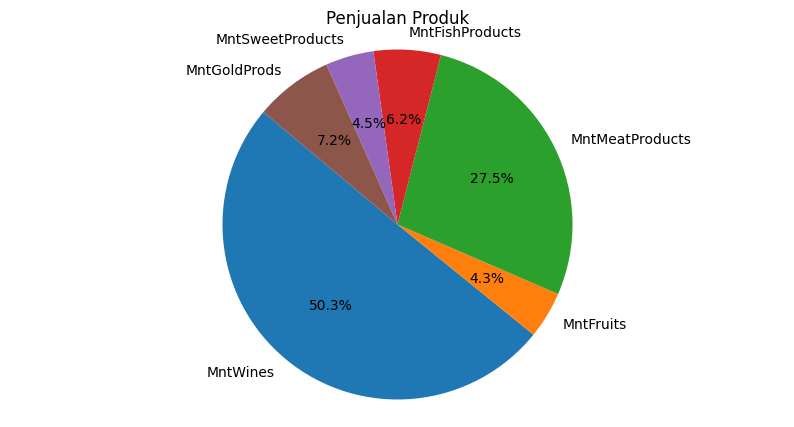

In [62]:
# create piechart dengan matplotlib
plt.figure(figsize = (10,5))
plt.pie(product_summary['Total'], labels=product_summary['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Penjualan Produk')
plt.axis('equal')
plt.show()

Berdasarkan piechart penjualan produk diatas dapat diketahui bahwa produk yang memiliki penjualan tertinggi adalah produk wine, dan terendah adalah fruit

# 6. Tingkat Penerimaan Pelanggan terhadap Campaign Promo

Mengevaluasi seberapa efektif  campaign promo sebelumnya berdasarkan pada berapa banyak pelanggan yang menerima tawaran dalam setiap kampanye (AcceptedCmp1 hingga AcceptedCmp5) dan tanggapan terhadap kampanye terakhir (Response).

In [63]:
# Sum untuk masing-masing kampanye promosi
cmp_sums = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Buat DataFrame baru
cmp_summary = pd.DataFrame({
    'Campagne': cmp_sums.index,
    'Total': cmp_sums.values
})

cmp_summary

,Campagne,Total
0,AcceptedCmp1,142
1,AcceptedCmp2,30
2,AcceptedCmp3,163
3,AcceptedCmp4,164
4,AcceptedCmp5,161
5,Response,333


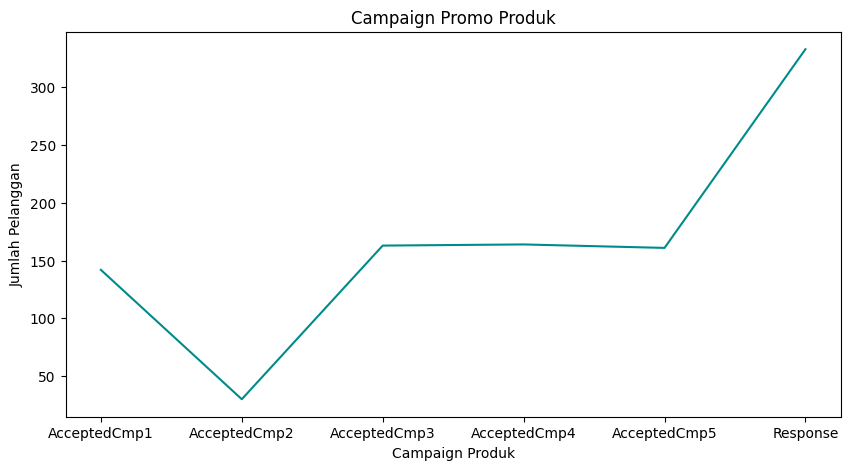

In [64]:
# create line chart dengan matplotlib
plt.figure(figsize = (10,5))
plt.plot(cmp_summary['Campagne'], cmp_summary['Total'], color = '#008B8B')
plt.title('Campaign Promo Produk')
plt.xlabel('Campaign Produk')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Berdasarkan hasil line chart diatas menunjukkan bahwa penerimaan pelanggan paling banyak adalah pada pada campaign terakhir, untuk campaign promosi ke 1, 3, 4, dan 5 cenderung stagnan, namun terdapat penuruan pada campaign promo ke 2

# 7. Analisis Frekuensi Pembelian Melalui Berbagai Channel Pembelian

Analisis Frekuensi pembelian melalui berbagai saluran (NumWebPurchases, NumCatalogPurchases, NumStorePurchases)

In [65]:
# Sum untuk masing-masing channel
channel_sums = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Buat DataFrame baru
channel_summary = pd.DataFrame({
    'Channel': channel_sums.index,
    'Total': channel_sums.values
})

channel_summary

,Channel,Total
0,NumWebPurchases,9043
1,NumCatalogPurchases,5911
2,NumStorePurchases,12844


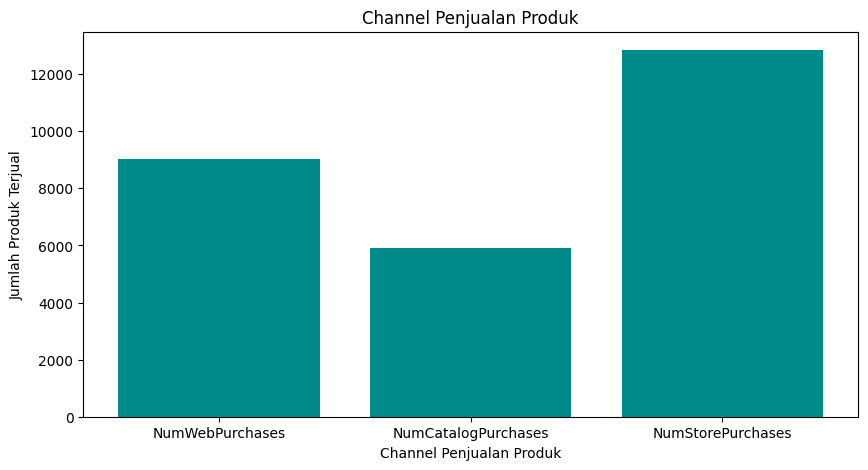

In [66]:
# create barchart dengan matplotlib
plt.figure(figsize = (10,5))
plt.bar(channel_summary['Channel'], channel_summary['Total'], color = '#008B8B')
plt.title('Channel Penjualan Produk')
plt.xlabel('Channel Penjualan Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.show()

Berdasarkan hasil barchart channel penjualan produk diatas menunjukkan bahwa penjualan produk paling tinggi melalui store langsung, kemudian dilanjutkan melalui channel web dan kemudian catalog.

# 8. Analisis Korelasi Web Visit dan Pembelian Melalui Web

Mengevaluasi hubungan antara jumlah kunjungan ke situs web perusahaan (NumWebVisitsMonth) dan jumlah pembelian melalui situs web. Apakah pelanggan yang sering mengunjungi situs web juga cenderung lebih aktif dalam berbelanja secara online?

In [67]:
# uji normalitas kunjungan ke situs web
from scipy.stats import normaltest
stats, pval5=normaltest(df['NumWebVisitsMonth'])
if pval5<= 0.05:
    print('Tolak H0, Data tidak berdistribusi normal')
else:
    print('Gagal tolak H0, Data berdistribusi normal')

Tolak H0, Data tidak berdistribusi normal


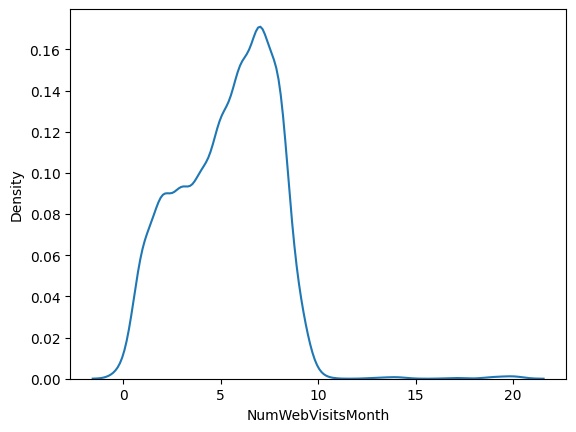

In [68]:
# cek KDE Plot
sns.kdeplot(df['NumWebVisitsMonth'])
plt.show()

Karena hasil uji normalitas dan KDE Plot menunjukkan bahwa variabel Income tidak berdistribusi normal maka akan dilakukan uji non parametrik menggunakan uji spearman

In [69]:
# Hitung korelasi Spearman
spearman_corr, p_value = spearmanr(df['NumWebVisitsMonth'], df['NumWebPurchases'])

print(f"Koefisien Korelasi Spearman: {spearman_corr}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.0972559078595838
P-Value: 4.596444770643231e-06


- Korelasi antara jumlah visit pelanggan ke web dan pembelian melalui web cenderung lemah dan negatif. Ini berarti terdapat kecenderungan bahwa ketika satu variabel meningkat, variabel lainnya cenderung menurun, meskipun tidak secara kuat
- Nilai P-Value yang sangat kecil menunjukkan bahwa hubungan ini tidak terjadi secara kebetulan dalam sampel yang di analisis, sehingga hasil korelasi antara visit pelanggan ke web dan pembelian melalui web signifikan secara statistik.

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa:
- Mayoritas pelanggan supermarket berumur 30 hingga 50 tahun, dengan pendapatan antara 20000 hingga 80000, level pendidikan graduate, dan memiliki jumlah anggota keluarga 3
- Produk supermarket yang paling banyak diminati oleh pelanggan adalah wine, kemudian disusul oleh meat, gold, fish, sweet products, dan yang terakhir fruit
- Berdasarkan campaign promo yang diberikan supermarket beberapa kali, penerimaan pelanggan paling banyak adalah pada pada campaign terakhir, untuk campaign promosi ke 1, 3, 4, dan 5 cenderung stagnan, namun terdapat penuruan pada campaign promo ke 2
- Channel pembelian yang paling banyak digunakan pelanggan untuk berbelanja dengan mendatangi store secara langsung, kemudian disusul pembelanjaan melalui web, dan yang terakhir melalui catalog
- Hasil korelasi antara visit pelanggan ke web dan pembelian melalui web signifikan secara statistik

Sehingga rekomendasi yang dapat diberikan adalah:
- Supermarket dapat melakukan marketing yang terpusat pada profil pelanggan yang telah dianalisis sebelumnya
- Dengan melihat preferensi pelanggan terhadap produk supermarket, maka supermarket dapat mengantisipasi stock produk yang ada berdasarkan yang paling banyak diminati hingga kurang diminati, sehingga supermarket tidak akan kehabisan stock produk
- Untuk menambah kepuasan pelanggan dalam berbelanja di supermarket, maka channel pembelian paling banyak yaitu store dapat ditambah fasilitas dan kenyamanannya, sehingga dapat menarik pelanggan lebih banyak lagi